### <h1 align="center">CPSC 4830</h1>
<h2 align="center">MIDTERM</h2>
<h2 align="center">TIME - 2 HR 30 MIN</h2>
<h2 align="center">START TIME - 3.30 PM, END TIME - 6.00 PM</h2>
<h2 align="center">MAX MARKS - 20</h2>

<h2 align="center">All work must be completed in this file and Submit the resulting .ipynb in D2L</h2>

<h2 align="center"> Absolutely No Collaboration. Solutions with 90% and above similarity would be investigated further for possible plagiarism and cheating. If found guilty, then collobarators would be assigned a grade of 0 without any grades even for non cheated part.</h2>


### Q1. The SMS Spam Collection is a set of SMS tagged messages that have been collected from SMS Spam research database. It contains one set of SMS messages in English of 5,572 messages, tagged acording being ham (legitimate) or spam.

### Out of the 5572 sets of sms messages, approximately 20% of the messages have been trimmed and kept aside for Evaluating your model by the Instructor. You only have 4458 rows to build your model. Rest will be used by the instructor as a blind evaluation of your model. This data is not provided to you.

### Use this dataset to build a prediction model as follows that will accurately classify which texts are spam? 

### Use Logistic Regression with L2 Regularisation and CV (K=3) (using your intelligent choice of Hyperparameters), find the accuracy of SPAM/HAM detection. [10 Marks]

In [99]:
import numpy as np
import pandas as pd
import seaborn as sns
sns.set()
%matplotlib inline
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.linear_model import LogisticRegressionCV
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.preprocessing import StandardScaler

In [3]:
spamhamtrain_df = pd.read_csv("spamhamtrain.csv")

In [18]:
spamhamtrain_df.head(10)

,Category,Message
0,ham,"K I'm leaving soon, be there a little after 9"
1,ham,No. Yes please. Been swimming?
2,ham,It took Mr owl 3 licks
3,ham,Its going good...no problem..but still need li...
4,ham,K.. I yan jiu liao... Sat we can go 4 bugis vi...
5,ham,I sent your maga that money yesterday oh.
6,ham,Does cinema plus drink appeal tomo? * Is a fr ...
7,ham,"Now, whats your house # again ? And do you hav..."
8,spam,Back 2 work 2morro half term over! Can U C me ...
9,ham,"Hello baby, did you get back to your mom's ? A..."


In [17]:
spamhamtrain_df.info

<bound method DataFrame.info of      Category                                            Message
0         ham      K I'm leaving soon, be there a little after 9
1         ham                     No. Yes please. Been swimming?
2         ham                             It took Mr owl 3 licks
3         ham  Its going good...no problem..but still need li...
4         ham  K.. I yan jiu liao... Sat we can go 4 bugis vi...
...       ...                                                ...
4452      ham                            K:)k:)good:)study well.
4453      ham  Chinatown got porridge, claypot rice, yam cake...
4454      ham  Hmm... Dunno leh, mayb a bag 4 goigng out dat ...
4455      ham                           Tell me whos this pls:-)
4456      ham  You are gorgeous! keep those pix cumming :) th...

[4457 rows x 2 columns]>

In [8]:
spamhamtrain_df.describe

<bound method NDFrame.describe of      Category                                            Message
0         ham      K I'm leaving soon, be there a little after 9
1         ham                     No. Yes please. Been swimming?
2         ham                             It took Mr owl 3 licks
3         ham  Its going good...no problem..but still need li...
4         ham  K.. I yan jiu liao... Sat we can go 4 bugis vi...
...       ...                                                ...
4452      ham                            K:)k:)good:)study well.
4453      ham  Chinatown got porridge, claypot rice, yam cake...
4454      ham  Hmm... Dunno leh, mayb a bag 4 goigng out dat ...
4455      ham                           Tell me whos this pls:-)
4456      ham  You are gorgeous! keep those pix cumming :) th...

[4457 rows x 2 columns]>

In [12]:
#check for missing values

spamhamtrain_df.isnull().sum()

Category    0
Message     0
dtype: int64

In [13]:
#check for duplicates
spamhamtrain_df.duplicated().sum()

300

In [20]:
#drop the duplicates
df_clean = spamhamtrain_df.drop_duplicates(keep='first')

In [21]:
#check for duplicates
df_clean.duplicated().sum()

0

In [14]:
#check for shape
spamhamtrain_df.shape

(4457, 2)

In [22]:
df_clean.groupby('Category').describe()

Message                                                            \
           count unique                                                top   
Category                                                                     
ham         3635   3635  First has she gained more than  &lt;#&gt; kg s...   
spam         522    522  You have been specially selected to receive a ...   

               
         freq  
Category       
ham         1  
spam        1

In [25]:
df_clean['Category'] = df_clean['Category'] .replace(['spam'],1)

<ipython-input-25-878e33994fd8>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean['Category'] = df_clean['Category'] .replace(['spam'],1)


In [27]:
df_clean['Category'] = df_clean['Category'] .replace(['ham'],0)

<ipython-input-27-c4cc57af683d>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean['Category'] = df_clean['Category'] .replace(['ham'],0)


In [28]:
df_clean.head(10)

,Category,Message
0,0,"K I'm leaving soon, be there a little after 9"
1,0,No. Yes please. Been swimming?
2,0,It took Mr owl 3 licks
3,0,Its going good...no problem..but still need li...
4,0,K.. I yan jiu liao... Sat we can go 4 bugis vi...
5,0,I sent your maga that money yesterday oh.
6,0,Does cinema plus drink appeal tomo? * Is a fr ...
7,0,"Now, whats your house # again ? And do you hav..."
8,1,Back 2 work 2morro half term over! Can U C me ...
9,0,"Hello baby, did you get back to your mom's ? A..."


In [30]:
# Get the length of the messages
df_clean['length'] = df_clean['Message'].apply(len)

<ipython-input-30-32f507f0a762>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean['length'] = df_clean['Message'].apply(len)


In [31]:
df_clean.head()

,Category,Message,length
0,0,"K I'm leaving soon, be there a little after 9",45
1,0,No. Yes please. Been swimming?,30
2,0,It took Mr owl 3 licks,22
3,0,Its going good...no problem..but still need li...,102
4,0,K.. I yan jiu liao... Sat we can go 4 bugis vi...,155


In [32]:
#divide the dataset into ham and spam
# Let's get the length of the messages
ham_df = df_clean[df_clean['Category']==0]

In [33]:
spam_df = df_clean[df_clean['Category']==1]

In [34]:
spam_df.head()

,Category,Message,length
8,1,Back 2 work 2morro half term over! Can U C me ...,159
17,1,PRIVATE! Your 2003 Account Statement for shows...,134
21,1,HMV BONUS SPECIAL 500 pounds of genuine HMV vo...,155
26,1,Guess what! Somebody you know secretly fancies...,156
37,1,"500 New Mobiles from 2004, MUST GO! Txt: NOKIA...",142


In [36]:
ham_df.head()

,Category,Message,length
0,0,"K I'm leaving soon, be there a little after 9",45
1,0,No. Yes please. Been swimming?,30
2,0,It took Mr owl 3 licks,22
3,0,Its going good...no problem..but still need li...,102
4,0,K.. I yan jiu liao... Sat we can go 4 bugis vi...,155


In [51]:
from sklearn.feature_extraction.text import CountVectorizer

vectorizer = CountVectorizer()
spamham_countvectorizer = vectorizer.fit_transform(df_clean['Message'])


In [52]:
print(vectorizer.get_feature_names())

['00', '000', '000pes', '008704050406', '0089', '0121', '01223585236', '01223585334', '0125698789', '02', '0207', '02072069400', '02073162414', '02085076972', '021', '03', '04', '0430', '05', '050703', '0578', '06', '07', '07046744435', '07090201529', '07090298926', '07099833605', '07123456789', '0721072', '07732584351', '07734396839', '07742676969', '0776xxxxxxx', '07786200117', '077xxx', '078', '07801543489', '07808', '07808247860', '07808726822', '07815296484', '07821230901', '078498', '07880867867', '07946746291', '0796xxxxxx', '07973788240', '07xxxxxxxxx', '08', '0800', '08000407165', '08000776320', '08000839402', '08000930705', '08000938767', '08001950382', '08002888812', '08002986030', '08002986906', '08006344447', '0808', '08081263000', '08081560665', '0825', '083', '0844', '08448350055', '08448714184', '0845', '08450542832', '08452810071', '08452810073', '08452810075over18', '0870', '08700435505150p', '08700469649', '08700621170150p', '08701213186', '08701237397', '08701417012

In [53]:
#put it into array
print(spamham_countvectorizer.toarray())  

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


In [54]:
#Check the shape
spamham_countvectorizer.shape

(4157, 7718)

In [55]:
#Divide the dataset
X = spamham_countvectorizer
y = df_clean['Category']

In [56]:
X.shape

(4157, 7718)

In [57]:
y.shape

(4157,)

In [58]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)

In [78]:
log_reg_model = LogisticRegressionCV(solver='lbfgs', penalty="l2", max_iter=100, cv=3, multi_class='auto')

In [79]:
log_reg_model.fit(X_train,y_train)

LogisticRegressionCV(cv=3)

In [80]:
predict_spam = log_reg_model.predict(X_test)

In [81]:
data1 = {'y_test': y_test, 'y_hat': predict_spam}
pd.DataFrame(data1)

,y_test,y_hat
2357,0,0
2964,0,0
395,0,0
137,1,1
2617,0,0
...,...,...
1765,0,0
1791,0,0
4021,0,0
3517,0,0


In [82]:
from sklearn import metrics

cmatrix = metrics.confusion_matrix(y_test, predict_spam)
cmatrix1 = pd.DataFrame(cmatrix)
cmatrix1.columns = ['Actual - ham', 'Actual - spam']
cmatrix1.index = ['Predict - ham', 'Predict - spam']
cmatrix1

,Actual - ham,Actual - spam
Predict - ham,917,1
Predict - spam,13,109


In [83]:
print(classification_report(y_test, predict_spam))

              precision    recall  f1-score   support

           0       0.99      1.00      0.99       918
           1       0.99      0.89      0.94       122

    accuracy                           0.99      1040
   macro avg       0.99      0.95      0.97      1040
weighted avg       0.99      0.99      0.99      1040



## CROSS VALIDATION

In [86]:
from sklearn.model_selection import cross_val_score

scores_accuracy_3 = cross_val_score(log_reg_model, X_train, y_train, scoring='accuracy', cv=3)
scores_accuracy_3_DF = pd.DataFrame(scores_accuracy_3)
scores_accuracy_3_DF.index = ['k=1', 'k=2', 'k=3']
scores_accuracy_3_DF.columns = ['Accuracy']
scores_accuracy_3_DF

,Accuracy
k=1,0.979788
k=2,0.978826
k=3,0.973051


### Q2. Credit score cards are a common risk control method in the financial industry. It uses personal information and data submitted by credit card applicants to predict the probability of future defaults and credit card borrowings. The bank is able to decide whether to issue a credit card to the applicant. Credit scores can objectively quantify the magnitude of risk. 

### The data file credit_card_application.csv contains all the details collected from different customers whose attributes are explained in the table below. 

<style type="text/css">
.tg  {border-collapse:collapse;border-spacing:0;}
.tg td{font-family:Arial, sans-serif;font-size:14px;padding:10px 5px;border-style:solid;border-width:1px;overflow:hidden;word-break:normal;border-color:black;}
.tg th{font-family:Arial, sans-serif;font-size:14px;font-weight:normal;padding:10px 5px;border-style:solid;border-width:1px;overflow:hidden;word-break:normal;border-color:black;}
.tg .tg-cly1{text-align:left;vertical-align:middle}
.tg .tg-0lax{text-align:left;vertical-align:top}
</style>
<table class="tg">
  <tr>
    <th class="tg-cly1">Feature name</th>
    <th class="tg-cly1">Explanation</th>
    <th class="tg-cly1">Remarks</th>
  </tr>
  <tr>
    <td class="tg-cly1">ID</td>
    <td class="tg-cly1">client number</td>
    <td class="tg-cly1"></td>
  </tr>
  <tr>
    <td class="tg-cly1">'CODE_GENDER'</td>
    <td class="tg-cly1">gender</td>
    <td class="tg-cly1"></td>
  </tr>
  <tr>
    <td class="tg-cly1">'FLAGOWNCAR'</td>
    <td class="tg-cly1">Is there a car</td>
    <td class="tg-cly1"></td>
  </tr>
  <tr>
    <td class="tg-cly1">'FLAGOWNREALTY'</td>
    <td class="tg-cly1">Is there a property</td>
    <td class="tg-cly1"></td>
  </tr>
  <tr>
    <td class="tg-cly1">'CNT_CHILDREN'</td>
    <td class="tg-cly1">Number of children</td>
    <td class="tg-cly1"></td>
  </tr>
  <tr>
    <td class="tg-cly1">'AMTINCOMETOTAL'</td>
    <td class="tg-cly1">Annual income</td>
    <td class="tg-cly1"></td>
  </tr>
  <tr>
    <td class="tg-cly1">'NAMEINCOMETYPE'</td>
    <td class="tg-cly1">Income category</td>
    <td class="tg-cly1"></td>
  </tr>
  <tr>
    <td class="tg-cly1">'NAMEEDUCATIONTYPE'</td>
    <td class="tg-cly1">education level</td>
    <td class="tg-cly1"></td>
  </tr>
  <tr>
    <td class="tg-cly1">'NAMEFAMILYSTATUS'</td>
    <td class="tg-cly1">Marital status</td>
    <td class="tg-cly1"></td>
  </tr>
  <tr>
    <td class="tg-cly1">'NAMEHOUSINGTYPE'</td>
    <td class="tg-cly1">Way of living</td>
    <td class="tg-cly1"></td>
  </tr>
  <tr>
    <td class="tg-cly1">'DAYS_BIRTH'</td>
    <td class="tg-cly1">birthday</td>
    <td class="tg-cly1"></td>
  </tr>
  <tr>
    <td class="tg-cly1">'DAYS_EMPLOYED'</td>
    <td class="tg-cly1">Start date</td>
    <td class="tg-cly1"></td>
  </tr>
  <tr>
    <td class="tg-cly1">'FLAG_MOBIL'</td>
    <td class="tg-cly1">Is there a mobile phone</td>
    <td class="tg-cly1"></td>
  </tr>
  <tr>
    <td class="tg-0lax">'FLAGWORKPHONE'</td>
    <td class="tg-0lax">Is there a work phone</td>
    <td class="tg-0lax"></td>
  </tr>
  <tr>
    <td class="tg-0lax">'FLAG_PHONE'</td>
    <td class="tg-0lax">Is there a phone</td>
    <td class="tg-0lax"></td>
  </tr>
  <tr>
    <td class="tg-0lax">'FLAG_EMAIL'</td>
    <td class="tg-0lax">Is there an email</td>
    <td class="tg-0lax"></td>
  </tr>
  <tr>
    <td class="tg-0lax">'OCCUPATION_TYPE'</td>
    <td class="tg-0lax">Occupation</td>
    <td class="tg-0lax"></td>
  </tr>
  <tr>
    <td class="tg-0lax">'CNTFAMMEMBERS'</td>
    <td class="tg-0lax">Family size</td>
    <td class="tg-0lax"></td>
  </tr>
  <tr>
    <td class="tg-0lax">begin_month</td>
    <td class="tg-0lax">record month</td>
    <td class="tg-0lax">The month of the extracted data is the starting point, backwards, 0 is the current month, -1 is the previous month, and so on</td>
  </tr>
  <tr>
    <td class="tg-0lax">target</td>
    <td class="tg-0lax"></td>
    <td class="tg-0lax">1 for high risk and 0 for low risk</td>
  </tr>
</table>


### Use PCA to find the principle components of the given data. Find the retained variance of the data and how much is lost due to applying PCA. If required drop the Null values in the column and get rid of unnecessary categorical columns before applying PCA. 
### Explain each step including why some columns are to be dropped before applying PCA. Scaling is necessary and must be applied here.

### [10 Marks]

In [145]:
credit_df = pd.read_csv("credit_card_application.csv")

In [123]:
credit_df.head()

,ID,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,begin_month,target
0,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2,-15,0
1,5008805,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2,-14,0
2,5008806,M,Y,Y,0,112500.0,Working,Secondary / secondary special,Married,House / apartment,-21474,-1134,1,0,0,0,Security staff,2,-29,0
3,5008808,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,1,0,1,1,Sales staff,1,-4,0
4,5008809,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,1,0,1,1,Sales staff,1,-26,0


In [124]:
credit_df.tail()

,ID,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,begin_month,target
36452,5149828,M,Y,Y,0,315000.0,Working,Secondary / secondary special,Married,House / apartment,-17348,-2420,1,0,0,0,Managers,2,-11,1
36453,5149834,F,N,Y,0,157500.0,Commercial associate,Higher education,Married,House / apartment,-12387,-1325,1,0,1,1,Medicine staff,2,-23,1
36454,5149838,F,N,Y,0,157500.0,Pensioner,Higher education,Married,House / apartment,-12387,-1325,1,0,1,1,Medicine staff,2,-32,1
36455,5150049,F,N,Y,0,283500.0,Working,Secondary / secondary special,Married,House / apartment,-17958,-655,1,0,0,0,Sales staff,2,-9,1
36456,5150337,M,N,Y,0,112500.0,Working,Secondary / secondary special,Single / not married,Rented apartment,-9188,-1193,1,0,0,0,Laborers,1,-13,1


In [125]:
credit_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36457 entries, 0 to 36456
Data columns (total 20 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   36457 non-null  int64  
 1   CODE_GENDER          36457 non-null  object 
 2   FLAG_OWN_CAR         36457 non-null  object 
 3   FLAG_OWN_REALTY      36457 non-null  object 
 4   CNT_CHILDREN         36457 non-null  int64  
 5   AMT_INCOME_TOTAL     36457 non-null  float64
 6   NAME_INCOME_TYPE     36457 non-null  object 
 7   NAME_EDUCATION_TYPE  36457 non-null  object 
 8   NAME_FAMILY_STATUS   36457 non-null  object 
 9   NAME_HOUSING_TYPE    36457 non-null  object 
 10  DAYS_BIRTH           36457 non-null  int64  
 11  DAYS_EMPLOYED        36457 non-null  int64  
 12  FLAG_MOBIL           36457 non-null  int64  
 13  FLAG_WORK_PHONE      36457 non-null  int64  
 14  FLAG_PHONE           36457 non-null  int64  
 15  FLAG_EMAIL           36457 non-null 

In [127]:
credit_df.describe()

,ID,CNT_CHILDREN,AMT_INCOME_TOTAL,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,CNT_FAM_MEMBERS,begin_month,target
count,3.645700e+04,36457.000000,3.645700e+04,36457.000000,36457.000000,36457.0,36457.000000,36457.000000,36457.000000,36457.000000,36457.000000,36457.000000
mean,5.078227e+06,0.430315,1.866857e+05,-15975.173382,59262.935568,1.0,0.225526,0.294813,0.089722,2.198453,-26.164193,0.016897
std,4.187524e+04,0.742367,1.017892e+05,4200.549944,137651.334859,0.0,0.417934,0.455965,0.285787,0.911686,16.501854,0.128886
min,5.008804e+06,0.000000,2.700000e+04,-25152.000000,-15713.000000,1.0,0.000000,0.000000,0.000000,1.000000,-60.000000,0.000000
25%,5.042028e+06,0.000000,1.215000e+05,-19438.000000,-3153.000000,1.0,0.000000,0.000000,0.000000,2.000000,-39.000000,0.000000
50%,5.074614e+06,0.000000,1.575000e+05,-15563.000000,-1552.000000,1.0,0.000000,0.000000,0.000000,2.000000,-24.000000,0.000000
75%,5.115396e+06,1.000000,2.250000e+05,-12462.000000,-408.000000,1.0,0.000000,1.000000,0.000000,3.000000,-12.000000,0.000000
max,5.150487e+06,19.000000,1.575000e+06,-7489.000000,365243.000000,1.0,1.000000,1.000000,1.000000,20.000000,0.000000,1.000000


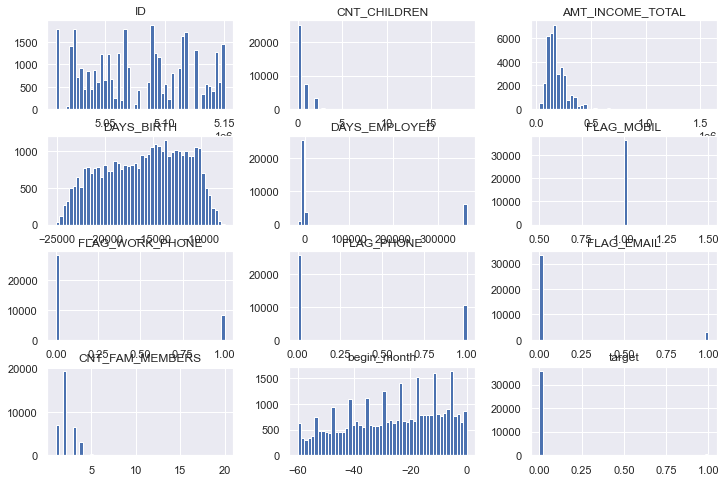

In [128]:
import matplotlib.pyplot as plt

credit_df.hist(bins=50, figsize=(12, 8))
plt.show()

## SCALING

In [129]:
credit_df.isnull().sum()

ID                         0
CODE_GENDER                0
FLAG_OWN_CAR               0
FLAG_OWN_REALTY            0
CNT_CHILDREN               0
AMT_INCOME_TOTAL           0
NAME_INCOME_TYPE           0
NAME_EDUCATION_TYPE        0
NAME_FAMILY_STATUS         0
NAME_HOUSING_TYPE          0
DAYS_BIRTH                 0
DAYS_EMPLOYED              0
FLAG_MOBIL                 0
FLAG_WORK_PHONE            0
FLAG_PHONE                 0
FLAG_EMAIL                 0
OCCUPATION_TYPE        11323
CNT_FAM_MEMBERS            0
begin_month                0
target                     0
dtype: int64

In [146]:
credit_df.drop('OCCUPATION_TYPE',axis=1,inplace=True)

In [157]:
#OTHER VARIABLES ARE DROPPED AS THE PCA IS GOOD FOR CONTINUOUS

In [158]:
features = ['CNT_CHILDREN', 'AMT_INCOME_TOTAL', 'DAYS_EMPLOYED', 'DAYS_BIRTH','CNT_FAM_MEMBERS', 'begin_month']
X = credit_df.loc[:, features].values
X

array([[ 0.0000e+00,  4.2750e+05, -4.5420e+03, -1.2005e+04,  2.0000e+00,
        -1.5000e+01],
       [ 0.0000e+00,  4.2750e+05, -4.5420e+03, -1.2005e+04,  2.0000e+00,
        -1.4000e+01],
       [ 0.0000e+00,  1.1250e+05, -1.1340e+03, -2.1474e+04,  2.0000e+00,
        -2.9000e+01],
       ...,
       [ 0.0000e+00,  1.5750e+05, -1.3250e+03, -1.2387e+04,  2.0000e+00,
        -3.2000e+01],
       [ 0.0000e+00,  2.8350e+05, -6.5500e+02, -1.7958e+04,  2.0000e+00,
        -9.0000e+00],
       [ 0.0000e+00,  1.1250e+05, -1.1930e+03, -9.1880e+03,  1.0000e+00,
        -1.3000e+01]])

In [159]:
y = credit_df.loc[:,['target']].values
y

array([[0],
       [0],
       [0],
       ...,
       [1],
       [1],
       [1]], dtype=int64)

In [161]:
pd.DataFrame(data = X, columns = features).head()

,CNT_CHILDREN,AMT_INCOME_TOTAL,DAYS_EMPLOYED,DAYS_BIRTH,CNT_FAM_MEMBERS,begin_month
0,0.0,427500.0,-4542.0,-12005.0,2.0,-15.0
1,0.0,427500.0,-4542.0,-12005.0,2.0,-14.0
2,0.0,112500.0,-1134.0,-21474.0,2.0,-29.0
3,0.0,270000.0,-3051.0,-19110.0,1.0,-4.0
4,0.0,270000.0,-3051.0,-19110.0,1.0,-26.0


In [143]:
from sklearn.decomposition import PCA
pca = PCA(.95)

In [163]:
principalComponents = pca.fit_transform(X_train)

In [165]:
principalDf = pd.DataFrame(data = principalComponents
             , columns = ['PC 1', 'PC 2', 'PC 3', 'PC 4'])
principalDf

,PC 1,PC 2,PC 3,PC 4
0,1.662810,2.844459,13.186398,1.648380
1,-1.052238,-1.131298,0.005386,1.407466
2,2.861814,-1.146453,-1.298171,0.510195
3,0.075825,-1.660320,0.275579,-1.273949
4,-0.659798,-0.261778,-0.234242,0.085010
...,...,...,...,...
27337,3.079087,0.312066,-0.724433,-0.156691
27338,0.454413,1.426226,1.034750,0.008739
27339,2.977163,-0.500440,-0.684994,0.316137
27340,-0.069846,0.349133,-0.224193,-1.582637
